In [106]:
import pandas as pd

df = pd.read_csv('../data/cleaned_COT_data.csv',index_col=0)
for i in df.columns:
    df[i] = pd.to_numeric(df[i].values.reshape(-1),errors='coerce') 
df

,H-110 COT,H-120 COT,H-130 COT,H-140 COT,H-150 COT,H-160 COT,H-170 COT,H-180 COT,H-190 COT
日期,,,,,,,,,
2020-01-01 00:00:00,824.37,824.76,824.67,237.69,825.08,830.80,814.64,824.68,825.01
2020-01-01 00:10:00,825.28,825.38,825.61,252.83,825.51,834.09,815.16,825.39,825.42
2020-01-01 00:20:00,824.67,824.87,824.47,265.87,824.03,840.08,814.72,824.52,824.96
2020-01-01 00:30:00,823.62,824.49,824.76,275.72,823.62,845.13,814.67,824.05,824.67
2020-01-01 00:40:00,825.00,824.92,825.07,285.64,825.80,845.21,815.50,825.41,825.17
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:20:00,818.15,817.72,817.37,818.09,817.59,816.89,817.96,817.18,478.11
2020-12-31 23:30:00,817.00,817.63,816.80,817.88,817.20,818.47,817.68,817.58,469.84
2020-12-31 23:40:00,817.50,817.39,817.53,818.45,817.37,817.88,817.68,817.61,463.99


In [107]:
df = df.dropna(axis=0)
df.isnull().sum()

H-110 COT    0
H-120 COT    0
H-130 COT    0
H-140 COT    0
H-150 COT    0
H-160 COT    0
H-170 COT    0
H-180 COT    0
H-190 COT    0
dtype: int64

In [108]:
df

,H-110 COT,H-120 COT,H-130 COT,H-140 COT,H-150 COT,H-160 COT,H-170 COT,H-180 COT,H-190 COT
日期,,,,,,,,,
2020-01-01 00:00:00,824.37,824.76,824.67,237.69,825.08,830.80,814.64,824.68,825.01
2020-01-01 00:10:00,825.28,825.38,825.61,252.83,825.51,834.09,815.16,825.39,825.42
2020-01-01 00:20:00,824.67,824.87,824.47,265.87,824.03,840.08,814.72,824.52,824.96
2020-01-01 00:30:00,823.62,824.49,824.76,275.72,823.62,845.13,814.67,824.05,824.67
2020-01-01 00:40:00,825.00,824.92,825.07,285.64,825.80,845.21,815.50,825.41,825.17
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:10:00,819.03,819.64,819.02,818.52,818.72,818.69,818.72,818.77,490.07
2020-12-31 23:20:00,818.15,817.72,817.37,818.09,817.59,816.89,817.96,817.18,478.11
2020-12-31 23:30:00,817.00,817.63,816.80,817.88,817.20,818.47,817.68,817.58,469.84


In [109]:
import requests
url = 'https://gist.githubusercontent.com/skywalker0803r/e2502cb54a30f57bfb703ad9c9c8284a/raw/2fb5b2ab544aa883068f3a48bbdca5f89280eff1/autoencoder_knn.py'
exec(requests.get(url).text)

In [110]:
data = df.values[:-1]
test_data = df.values[-1:]
data.shape
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss = StandardScaler()
data = ss.fit_transform(data)
test_data = ss.transform(test_data)
model = autoencoder_knn(9,2)
model.train(data,epochs=50)

Epoch 1/50
206/206 [==============================] - 0s 654us/step - loss: 1.2411
Epoch 2/50
206/206 [==============================] - 0s 636us/step - loss: 0.9841
Epoch 3/50
206/206 [==============================] - 0s 652us/step - loss: 0.8633
Epoch 4/50
206/206 [==============================] - 0s 664us/step - loss: 0.7772
Epoch 5/50
206/206 [==============================] - 0s 627us/step - loss: 0.7307
Epoch 6/50
206/206 [==============================] - 0s 634us/step - loss: 0.7054
Epoch 7/50
206/206 [==============================] - 0s 619us/step - loss: 0.6929
Epoch 8/50
206/206 [==============================] - 0s 629us/step - loss: 0.6866
Epoch 9/50
206/206 [==============================] - 0s 620us/step - loss: 0.6833
Epoch 10/50
206/206 [==============================] - 0s 614us/step - loss: 0.6815
Epoch 11/50
206/206 [==============================] - 0s 625us/step - loss: 0.6803
Epoch 12/50
206/206 [==============================] - 0s 634us/step - loss: 0.6794
E

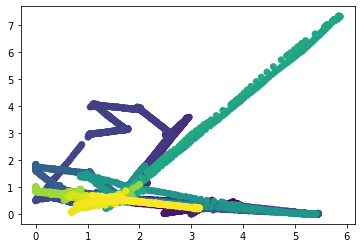

In [111]:
import matplotlib.pyplot as plt
x = model.encoder(data)[:,0]
y = model.encoder(data)[:,1]
c = [*range(len(data))]
plt.scatter(x,y,c=c)

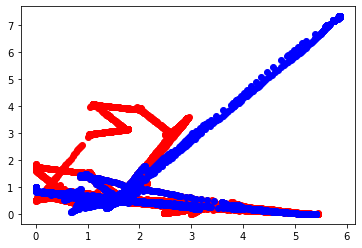

In [112]:
n = int(len(data)/2)
x = model.encoder(data)[:,0][:30000]
y = model.encoder(data)[:,1][:30000]
c = [*range(len(data))][:100]
plt.scatter(x,y,c='r')
x = model.encoder(data)[:,0][-30000:]
y = model.encoder(data)[:,1][-30000:]
c = [*range(len(data))][:100]
plt.scatter(x,y,c='b')

In [113]:
idx = model.predict(test_data[0].reshape(1,-1))
idx

array([[52695]], dtype=int64)

In [114]:
data[idx[0][0]]

array([ 0.13680013,  0.27543701,  0.29560873,  0.34125475,  0.31793519,
        0.22584424,  0.15588   ,  0.40975949, -1.79480322])

In [115]:
test_data[0]

array([ 0.13625843,  0.28046928,  0.29714419,  0.33431996,  0.31699898,
        0.22439571,  0.15798467,  0.40828198, -1.82444955])